# Web Scraping

In [ ]:
import math
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import numpy as np
# Profile link that we want to know who he/she follows
url="https://letterboxd.com/nyanni35/following/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
person= int(soup.find_all("li",attrs={"class":"selected"})[0].a.get("title").replace("\xa0people","").replace(",",""))
#Gets followers and append them to a list named followinglist.
followinglist=[]
for i in range(math.ceil(person/25)):
  url="https://letterboxd.com/nyanni35/following/"+"page/"+str(i+1)
  response = requests.get(url)
  soup = BeautifulSoup(response.content, "html.parser")
  for person in soup.find_all("a",attrs={"class":"name"}):
    followinglist.append(person.get("href"))

In [ ]:
# Randomly shuffled the url list. The profile we scraping was randomly following people and he was following random people to get more followers. 
# We shuffled again to make it more random.
import random
random.shuffle(followinglist)
print(followinglist[:5])

['/dcas4nova/', '/kwesivocals/', '/stephywephy/', '/ashleyewalker/', '/brief_ex/']
['/emreavsar/', '/grande_giove/', '/amirhossein01/', '/apocan/', '/khiabett/']


In [ ]:
import numpy as np
# Our dataframe
dftemp = pd.DataFrame({"userid":[np.nan],"movieid":[np.nan],"rating":[np.nan]})
number_of_person = 300
# This code gets 300 random profile's all movie ratings.
for userurl in followinglist[:number_of_person]:
  url="https://letterboxd.com"+userurl+"films/by/rated-date/"
  response = requests.get(url)
  soup = BeautifulSoup(response.content, "html.parser")
  try:
    totalpagenumberstr=soup.find_all("li",attrs={"class":"paginate-page"})[-1].text
    for page in range(int(totalpagenumberstr)):
      urlpage = url+"page/"+str(page+1)

      response = requests.get(urlpage)
      soup = BeautifulSoup(response.content, "html.parser")

      for link in soup.find_all("li",attrs={"class":"poster-container"}):
      #link.div.get("data-film-slug")
      #
        try:
          dftemp.loc[len(dftemp.index)]=[userurl,link.div.get("data-target-link"),link.p.span.get("class")[-1].replace("rated-","")]
        # It helps to find all anchor tag’s
        except:
          dftemp.loc[len(dftemp.index)]=[userurl,link.div.get("data-target-link"),"Not Rated"]
      
  except:
    continue 

In [ ]:
data = pd.read_csv("460users_all_ratings.csv")
data

,userid,movieid,rating
1,/halloweenhenry/,/film/the-king-of-kong-a-fistful-of-quarters/,10
2,/halloweenhenry/,/film/the-celebration/,7
3,/halloweenhenry/,/film/the-legend-of-hell-house/,8
4,/halloweenhenry/,/film/easy-rider/,8
5,/halloweenhenry/,/film/planet-of-the-apes/,8
...,...,...,...
191707,/jjram00/,/film/werewolf-by-night/,Not Rated
191708,/jjram00/,/film/far-from-the-tree-2021/,Not Rated
191709,/jjram00/,/film/nimic/,Not Rated
191710,/jjram00/,/film/bao-2018/,Not Rated


# Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321515 entries, 1 to 191711
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   userid   321515 non-null  object
 1   movieid  321515 non-null  object
 2   rating   321515 non-null  object
dtypes: object(3)
memory usage: 9.8+ MB


In [ ]:
data.describe()

,userid,movieid,rating
count,321515,321515,321515
unique,459,35287,12
top,/dannyboyff/,/film/joker-2019/,Not Rated
freq,3837,386,58307


In [ ]:
data.rating.unique()

array(['10', '7', '8', '5', '3', '4', '6', '2', '9', '1', 'Not Rated',
       'Liked, Not Rated'], dtype=object)

In [ ]:
data.isna().sum()
#We have no missing values. 

userid     0
movieid    0
rating     0
dtype: int64

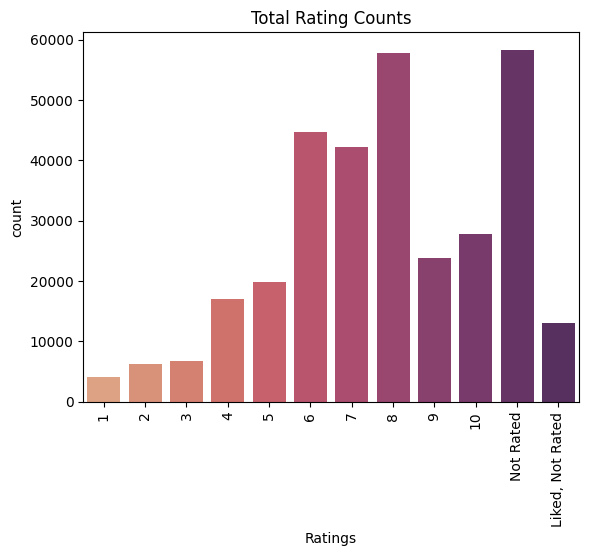

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
order = ["1","2","3","4","5","6","7","8","9","10","Not Rated","Not Rated but Liked"]
sns.countplot(data,x="rating",order=order,palette="flare")
plt.xticks(rotation=90)
plt.xlabel("Ratings")
plt.title("Total Rating Counts")
plt.show()

In [ ]:
print("Mean of Numeric Ratings is: ", data.query("rating in ['1','2','3','4','5','6','7','8','9','10']")["rating"].astype(int).mean())
print("Median of Numeric Ratings is: ",data.query("rating in ['1','2','3','4','5','6','7','8','9','10']")["rating"].astype(int).median())

Mean of Numeric Ratings is:  6.880378836317136
Median of Numeric Ratings is:  7.0


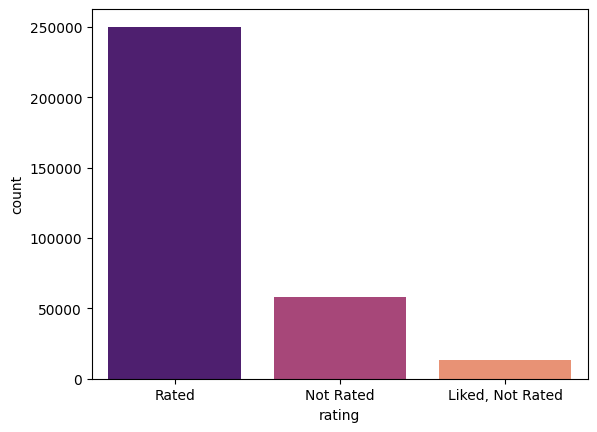

In [ ]:
sns.countplot(x=data["rating"].apply(lambda x: "Rated" if x in ['1','2','3','4','5','6','7','8','9','10'] else x), palette="magma")
plt.show()